## Goals of Today's Lecture:

1. Summing up Week 1
3. Confidence Intervals

### This Weeek Today

- Probability - Helps us quantify uncertainty under defined events
- Random Variables - Enable us to mathematically map those events
- Sampling - Helps us make generalizations about larger populations
- Central Limit Theorem - Helps us describe the population regardless of its distribution
- Hypothesis Testing - Helps us statistically gauge significant effects

## An Analogy for Intervals

<img src="img/dog_hydrant.jpg" width="250">

### Confidence Intervals


![formula](./img/margin_of_error.png)

Point estimate +/- margin of error

    - Anything involving a hypothesis test will have a confidence interval.
    - Estimate can be comparing 2 population means (Null: mu1 - mu2 = 0)
    - Confidence intervals can involve anything besides the mean (i.e. correlations).

**KEY POINT** : Our level of confidence that if we obtained a sample of equal size, our sample interval would contain the population mean.

It **IS NOT** the probability that the population mean lies within our sample interval. <-- this implies that there is an element of probability related to having the population mean within our sample. 
The true population mean is either in or it is not.

Let's understand this better using a [visual display](https://shiny.rit.albany.edu/stat/confidence/).

### An Example
A bicycle advocacy group has come to us to see if it would make sense to increase the length of time users of Capital Bike Share have to ride on their bikes before they have to return them. Let's analyze a collection of Capital Bike Share data to determine if we should lengthen the time people have with their bikes.

In [5]:
import os
# os.chdir('/Users/schandrasekharan/Desktop/conf_int')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('data/201904-capitalbikeshare-tripdata.csv')

In [7]:
df.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,313,2019-04-01 00:03:03,2019-04-01 00:08:16,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W24063,Member
1,453,2019-04-01 00:07:37,2019-04-01 00:15:10,31119,14th & Belmont St NW,31298,15th & M St NW,W22080,Member
2,333,2019-04-01 00:09:31,2019-04-01 00:15:05,31203,14th & Rhode Island Ave NW,31519,1st & O St NW,W00276,Member
3,568,2019-04-01 00:10:20,2019-04-01 00:19:49,31202,14th & R St NW,31103,16th & Harvard St NW,W21582,Member
4,1609,2019-04-01 00:10:38,2019-04-01 00:37:28,31517,Union Market,31655,New Jersey Ave & F St NW,75558,Member


In [8]:
trip_durations = df['Duration']/60
trip_durations = trip_durations[trip_durations < 50]
trip_durations.describe()

count    324514.000000
mean         14.173228
std           9.659266
min           1.000000
25%           6.766667
50%          11.700000
75%          19.316667
max          49.983333
Name: Duration, dtype: float64

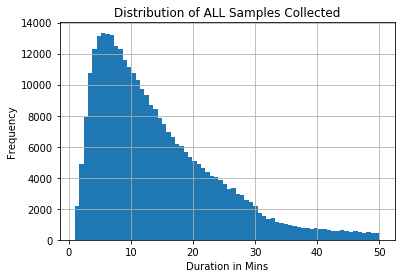

In [10]:
trip_durations.hist(bins=70)
plt.title("Distribution of ALL Samples Collected")
plt.xlabel("Duration in Mins")
plt.ylabel("Frequency")
plt.show()

In [11]:
#### The length of a bike ride is not normally distributed

#### Get population statistics

trip_durations.mode()

0    6.65
dtype: float64

In [12]:
pop_mean = trip_durations.mean()
pop_std = trip_durations.std()
print('pop_mean is {} \npop_std is {}'.format(pop_mean,pop_std))

pop_mean is 14.173227811434945 
pop_std is 9.659265893465061


#### Example 1:
Let's construct an 80% and 95% confidence interval for one of our samples: 

In [23]:
import numpy as np
import scipy.stats as scs
sample = np.random.choice(trip_durations, size=200)
sample_size = 200
sample_mean = sample.mean()

In [24]:
#80%
z_critical_upper = scs.norm.ppf(0.9)
# z_critical_lower = scs.norm.ppf(0.025)
margin_of_error = z_critical_upper * (pop_std/(sample_size**0.5))
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)
confidence_interval

(13.978683311125259, 15.729316688874743)

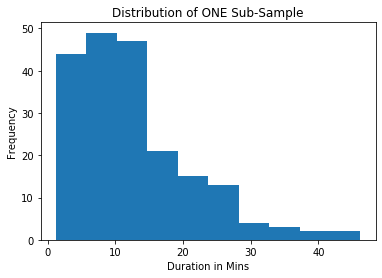

In [19]:
plt.hist(sample)
plt.title("Distribution of ONE Sub-Sample")
plt.xlabel("Duration in Mins")
plt.ylabel("Frequency")
plt.show()

In [33]:
many_samples = []

for i in range(1000):
    i = np.random.choice(trip_durations, size=200)
    many_samples.append(i.mean())

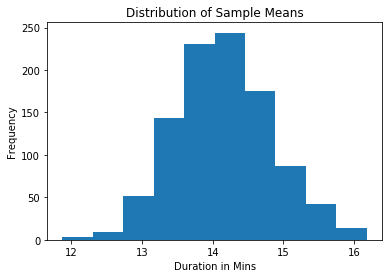

In [34]:
plt.hist(many_samples)
plt.title("Distribution of Sample Means")
plt.xlabel("Duration in Mins")
plt.ylabel("Frequency")
plt.show()

In [32]:
# 95%
sample_size = 200
sample_mean = sample.mean()
z_critical_upper = scs.norm.ppf(0.975)
z_critical_lower = scs.norm.ppf(0.025)
margin_of_error = z_critical_upper * (pop_std/(sample_size**0.5))
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)
confidence_interval

(13.515318645783637, 16.192681354216365)

#### Example 2:
The EPA considers indoor radon levels above 4 picocuries per liter (pCi/L) of air to be high enough to warrant amelioration efforts.  Tests in a sample of 200 Centre County Pennsylvania homes found 127 (63.5%) of these sampled households to have indoor radon levels above 4 pCi/L.  What is the population value being estimated by this sample percentage? What is the standard error of the corresponding sample proportion? What is the 95% confidence interval?"

In [ ]:
p = 0.635
std_error = (p*(1-p))/(200**0.5)

critical_value = scs.norm.ppf(0.975)
margin_of_error = critical_value*std_error
confidence_interval = (p - margin_of_error, p + margin_of_error)
print(confidence_interval)

### Using the t-distribution
Use if you don't know the population std dev (which you probably will never know). Also, with smaller sample sizes, more likely to hear anomalous events. So t-dist has fatter tails at the extremes. Rough rule, n>30, t-dist approximates normal distribution. But just a rough rule; you should always use the t-distribution regardless.

1. You are inspecting a hardware factory and want to construct a 90% confidence interval of acceptable screw lengths. You draw a sample of 30 screws and calculate their mean length as 4.8 centimeters and the standard deviation as 0.4 centimeters. What are the bounds of your confidence interval?


In [35]:
import scipy.stats as scs
n = 30
mean = 4.8
t_value = scs.t.ppf(0.95, n-1)
margin_error = t_value * 0.4/(n**0.5)
confidence_interval = (mean - margin_error, mean + margin_error)


In [36]:
confidence_interval

(4.6759133066001235, 4.924086693399876)

**Q:** Let's assume that we have a sample of size=49 and we know the standard deviation of the population is $\sigma = 5$. If we know that the sample mean is $\bar{x} = 20$. What might be a good estimate for the population mean if we also know that the population mean is bigger than 20?

20.899974274671468


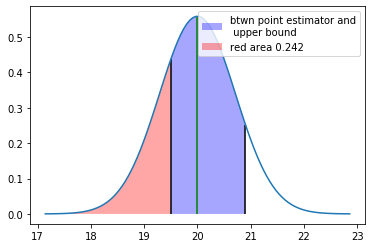

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
%matplotlib inline


#suppose population mu is 21
mu = 20
# sample mean gives us a point estimator
point_estimator = 19.5

# we know population variance is 49
std_error = 5/(np.sqrt(49))


# how much confidence do we require
confidence = 0.95

# alpha 
alpha = 1- confidence

# due to symmetry we divided alpha by 2
# note that to find z_alpha_over_2 we used 
# standard normal distribution

z_alpha_over_2 = np.abs(stats.norm.ppf(alpha/2))

# print(z_alpha_over_2)


# upper bound gives us a value so that
# 2*(the area between point_estimator - upper_bound) = confidence

upper_bound = point_estimator + z_alpha_over_2* std_error
print(upper_bound)

# now let's plot these

# a normal distribution with mean=mu and std=sigma
x = np.linspace(mu - 4*std_error, mu + 4*std_error, 100)
plt.plot(x, stats.norm.pdf(x, mu, std_error))

# a vertical line to mark point estimator
plt.vlines(point_estimator, ymin=0,
           ymax = stats.norm.pdf(point_estimator, mu, std_error))

# a vertical line for population mu
plt.vlines(mu, ymin=0,
           ymax = stats.norm.pdf(mu, mu, std_error),
          color = 'g')

# a vertical line for upper bound
plt.vlines(upper_bound, ymin=0,
           ymax = stats.norm.pdf(upper_bound, 
                                 mu, std_error))


# fill the area between upper_bound and point_estimator
plt.fill_between(x= np.linspace(point_estimator, upper_bound, 100), 
                 y1= stats.norm.pdf(np.linspace(point_estimator,
                                                upper_bound, 100), mu, std_error) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'btwn point estimator and\n upper bound')

# fill the area between point estimator and the left of it
plt.fill_between(x= np.linspace(mu - 4*std_error, point_estimator, 100), 
                 y1= stats.norm.pdf(np.linspace(mu - 4*std_error, point_estimator,100), mu, std_error) ,
                 facecolor='red',
                 alpha=0.35, 
                 label= 'red area %.3f'%(stats.norm.cdf(point_estimator, mu, std_error)))

plt.legend(loc = 'upper right')
plt.show()